In [5]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [6]:
df = pd.read_csv(r"Fertilizer.csv")

In [7]:
df.head()

,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,37,0,0,Urea
1,12,0,36,DAP
2,7,9,30,Fourteen-Thirty Five-Fourteen
3,22,0,20,Twenty Eight-Twenty Eight
4,35,0,0,Urea


1. **(Urea)**: Contains 37% Nitrogen, 0% Potassium, and 0% Phosphorous.
2. **(DAP)**: It contains 12% Nitrogen, 0% Potassium, and 36% Phosphorous.
3. **(Fourteen-Thirty Five-Fourteen)**: It contains 7% Nitrogen, 9% Potassium, and 30% Phosphorous.
4. **(Twenty Eight-Twenty Eight)**: It contains 22% Nitrogen, 0% Potassium, and 20% Phosphorous.
5. **(Urea)**: Similar to Row 0, it contains 35% Nitrogen, 0% Potassium, and 0% Phosphorous.

In [8]:
df.describe()

,Nitrogen,Potassium,Phosphorous
count,99.000000,99.000000,99.000000
mean,18.909091,3.383838,18.606061
std,11.599693,5.814667,13.476978
min,4.000000,0.000000,0.000000
25%,10.000000,0.000000,9.000000
50%,13.000000,0.000000,19.000000
75%,24.000000,7.500000,30.000000
max,42.000000,19.000000,42.000000


In [9]:
df['Fertilizer Name'].unique()

array(['Urea', 'DAP', 'Fourteen-Thirty Five-Fourteen',
       'Twenty Eight-Twenty Eight', 'Seventeen-Seventeen-Seventeen',
       'Twenty-Twenty', 'Ten-Twenty Six-Twenty Six'], dtype=object)

In [10]:
# Basic information about the dataset
print(df.info())

# Statistical summary of the dataset
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Nitrogen         99 non-null     int64 
 1   Potassium        99 non-null     int64 
 2   Phosphorous      99 non-null     int64 
 3   Fertilizer Name  99 non-null     object
dtypes: int64(3), object(1)
memory usage: 3.2+ KB
None
        Nitrogen  Potassium  Phosphorous
count  99.000000  99.000000    99.000000
mean   18.909091   3.383838    18.606061
std    11.599693   5.814667    13.476978
min     4.000000   0.000000     0.000000
25%    10.000000   0.000000     9.000000
50%    13.000000   0.000000    19.000000
75%    24.000000   7.500000    30.000000
max    42.000000  19.000000    42.000000


<Axes: xlabel='Fertilizer Name', ylabel='count'>

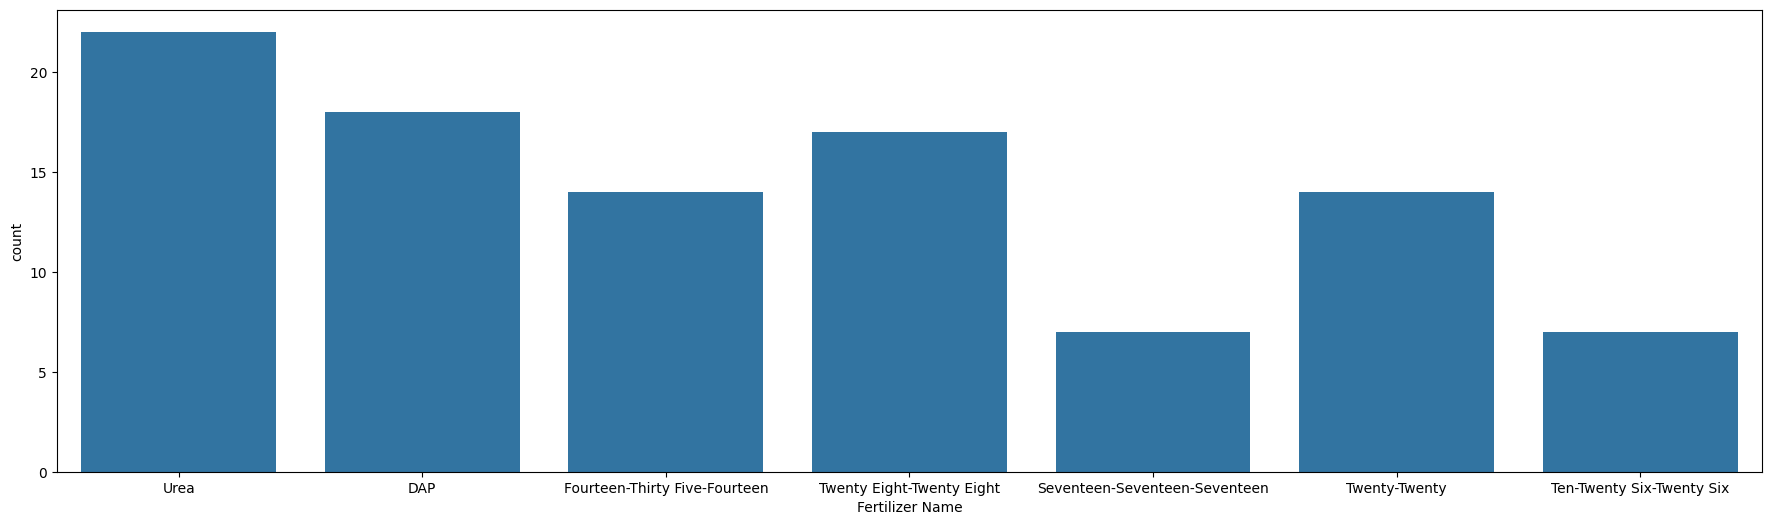

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(22,6))
sns.countplot(x='Fertilizer Name', data = df)

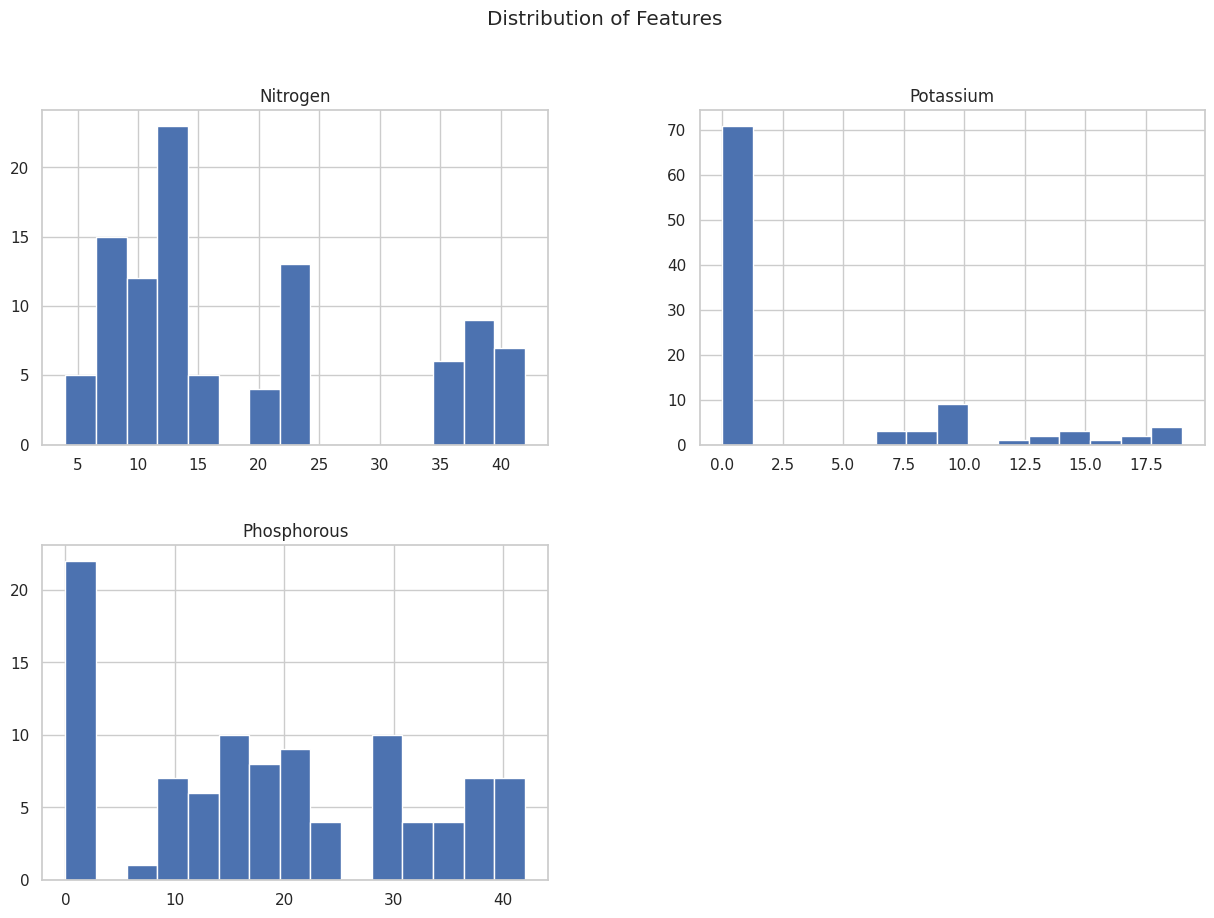

In [12]:
# Setting aesthetics for better readability of plots
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = [10, 8]

# Plotting histograms for each feature
df.hist(bins=15, figsize=(15, 10))
plt.suptitle('Distribution of Features')
plt.show()


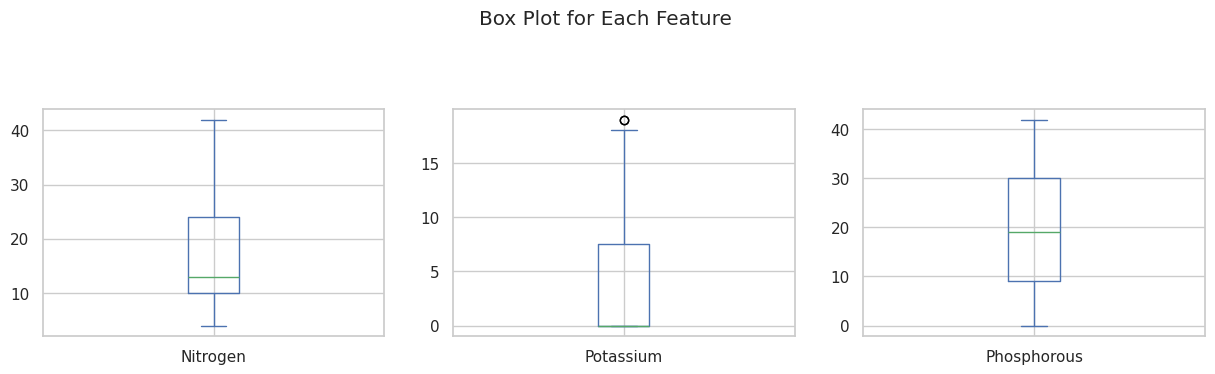

In [13]:
# Box plots for each feature
df.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(15, 10))
plt.suptitle('Box Plot for Each Feature')
plt.show()


In [14]:
corr = df.drop(columns=['Fertilizer Name']).corr()
corr

,Nitrogen,Potassium,Phosphorous
Nitrogen,1.000000,-0.500087,-0.686971
Potassium,-0.500087,1.000000,0.089192
Phosphorous,-0.686971,0.089192,1.000000


<Axes: >

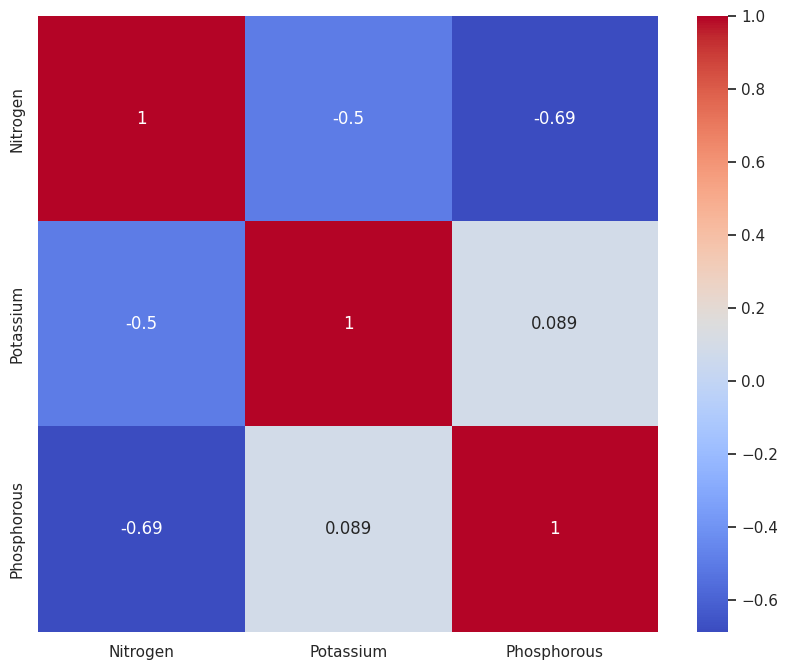

In [15]:
sns.heatmap(corr, annot = True, cbar = True, cmap = 'coolwarm')

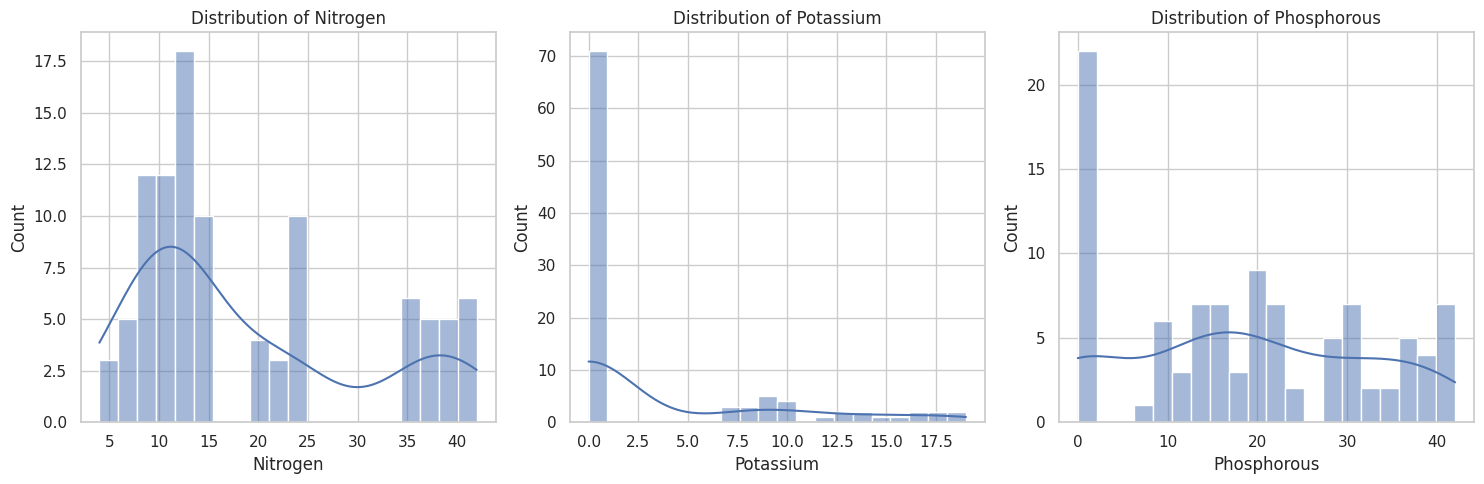

In [16]:
# Plotting the distribution graphs of the variables
plt.figure(figsize=(15, 5))

# Enumerating through each numeric column for distribution plot
for i, column in enumerate(['Nitrogen', 'Potassium', 'Phosphorous'], start=1):
    plt.subplot(1, 3, i)
    sns.histplot(df[column], bins=20, kde=True)
    plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()

# Removing the non-numeric column for correlation analysis
numeric_data = df.drop('Fertilizer Name', axis=1)

In [17]:
X = df.drop(columns=['Fertilizer Name'])
y = df['Fertilizer Name']

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,shuffle=True,random_state=42)

In [19]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [20]:
X_train[0]

array([ 0.46072126, -0.57643157,  0.09092764])

In [21]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=100,criterion = 'gini', random_state=42)
classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [22]:
y_pred = classifier.predict(X_test)

In [23]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test,y_pred)

[[7 0 0 0 0 0 0]
 [0 4 0 0 0 0 0]
 [0 0 2 0 0 0 0]
 [0 0 0 3 0 0 0]
 [0 0 0 0 6 0 0]
 [0 0 0 0 0 1 0]
 [0 0 0 0 0 0 7]]


1.0

In [24]:
from sklearn.preprocessing import LabelEncoder
encode_ferti = LabelEncoder()
df['Fertilizer Name']=encode_ferti.fit_transform(df['Fertilizer Name'])
#creating the dataframe
Fertilizer = pd.DataFrame(zip(encode_ferti.classes_,encode_ferti.transform(encode_ferti.classes_)),columns=['original','Encoded'])
Fertilizer = Fertilizer.set_index('original')
Fertilizer

,Encoded
original,
DAP,0
Fourteen-Thirty Five-Fourteen,1
Seventeen-Seventeen-Seventeen,2
Ten-Twenty Six-Twenty Six,3
Twenty Eight-Twenty Eight,4
Twenty-Twenty,5
Urea,6


In [25]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df.drop(columns=['Fertilizer Name']),df['Fertilizer Name'],test_size=0.2,random_state=1)
print('Shape of Splitting :')
print('x_train = {}, y_train = {}, x_test = {}, y_test = {}'.format(x_train.shape,y_train.shape,x_test.shape,y_test.shape))

Shape of Splitting :
x_train = (79, 3), y_train = (79,), x_test = (20, 3), y_test = (20,)


In [26]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 79 entries, 2 to 37
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Nitrogen     79 non-null     int64
 1   Potassium    79 non-null     int64
 2   Phosphorous  79 non-null     int64
dtypes: int64(3)
memory usage: 2.5 KB


In [27]:
rand = RandomForestClassifier(random_state = 42)
rand.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [28]:
pred_rand = rand.predict(x_test)

In [29]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

params = {
    'n_estimators':[300,400,500],
    'max_depth':[5,6,7],
    'min_samples_split':[2,5,8]
}
grid_rand = GridSearchCV(rand,params,cv=3,verbose=3,n_jobs=-1)

grid_rand.fit(x_train,y_train)

pred_rand = grid_rand.predict(x_test)

print(classification_report(y_test,pred_rand))

print('Best score : ',grid_rand.best_score_)
print('Best params : ',grid_rand.best_params_)

Fitting 3 folds for each of 27 candidates, totalling 81 fits
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         6

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20

Best score :  0.9876543209876543
Best params :  {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 300}


In [30]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute evaluation metrics
accuracy_rand = accuracy_score(y_test, pred_rand)
precision_rand = precision_score(y_test, pred_rand, average='weighted')
recall_rand = recall_score(y_test, pred_rand, average='weighted')
f1_rand = f1_score(y_test, pred_rand, average='weighted')

# Print evaluation metrics
print(f"Random Forest Classifier Metrics with GridSearchCV:")
print(f"Accuracy: {accuracy_rand}")
print(f"Precision: {precision_rand}")
print(f"Recall: {recall_rand}")
print(f"F1-score: {f1_rand}")

# Compute the confusion matrix
conf_matrix_rand = confusion_matrix(y_test, pred_rand)

Random Forest Classifier Metrics with GridSearchCV:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0


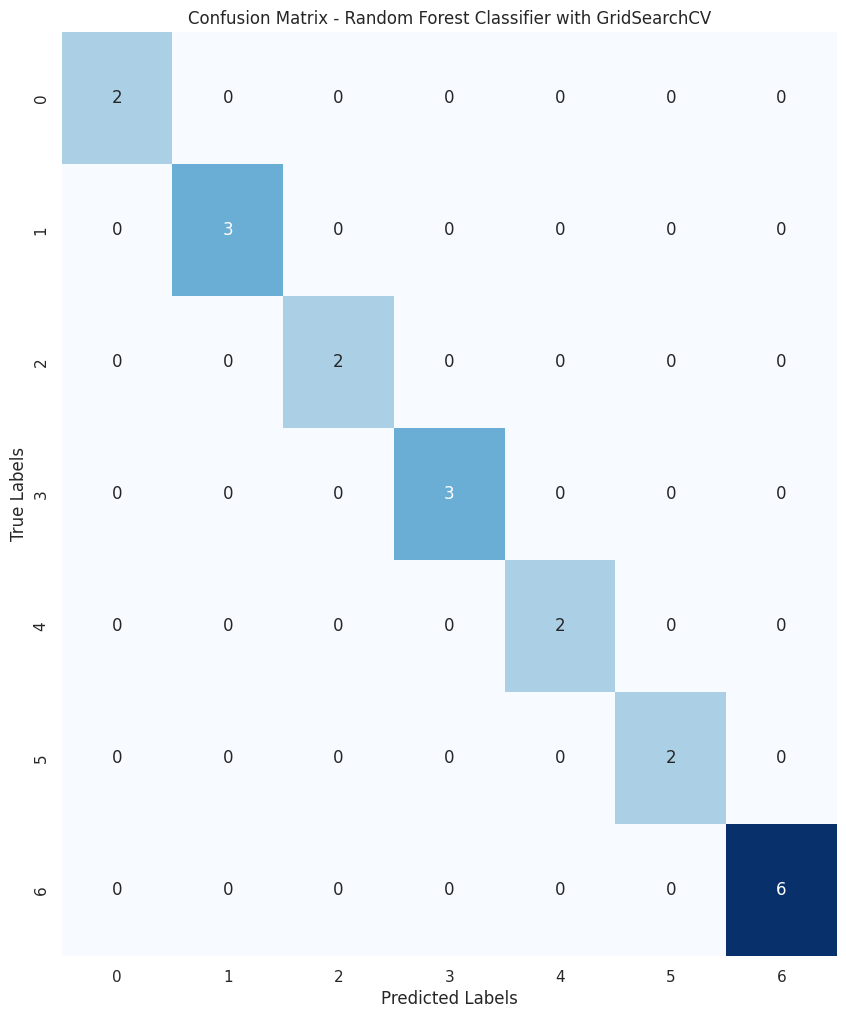

In [31]:
# Display the confusion matrix using seaborn heatmap
plt.figure(figsize=(10, 12))
sns.heatmap(conf_matrix_rand, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Random Forest Classifier with GridSearchCV')
plt.show()

In [32]:
import pickle
pickle_out = open('random_forest_model.pkl', 'wb')
pickle.dump(grid_rand,pickle_out)
pickle_out.close()